In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import *
from scipy.spatial import *
from scipy.linalg import *
import matplotlib
from matplotlib.colors import LogNorm
from matplotlib import rcParams
import glob
import funcs
import readsnap



M_sun      = 1.99e33   # in gms 
kpc        = 3.08e21   # in cms 
pc         = kpc/1.e3
k_b        = 1.380e-16 # in erg K^(-1)
m_proton   = 1.672e-24 # in gms 
gamma      = 5./3      # adiabatic index 
omega_m    = 0.272
omega_b    = 0.0455
omega_c    = omega_m - omega_b
sigma_dust = 5.e-22    # cm^(2) g^(-1)]] 
h          = 0.7       # Hubble_parameter
solar_metallicity = 0.02 #solar mass fraction


In [2]:
M_sun2gr            				= 1.99e33           # M☉ -> gr
pc2cm               				= 3.08e18           # pc -> cm 

gr2M_sun = 1/M_sun2gr
cm2pc = 1/pc2cm

In [3]:
snapshot = 120
nsteps = 1 #SPECIFY THE LOOP STEP FOR SNAPSHOTS

#file_dir = '/mnt/scratch-lustre/lakhlani/m12b_res56000/output/' 

#file_dir = '/mnt/scratch-lustre/lakhlani/m13_mr_Dec16_2013/'

file_dir = "/mnt/raid-project/murray/FIRE/FIRE_2/Fei_analysis/md/m12i_res7100_md/output"

In [4]:
P = readsnap.readsnap(file_dir, snapshot, 0, cosmological=1, loud = 1 )
P_star = readsnap.readsnap(file_dir, snapshot, 4, cosmological = 1)
P_dm = readsnap.readsnap(file_dir, snapshot, 1, cosmological = 1 )
header_info = readsnap.readsnap(file_dir, snapshot, 0 ,cosmological=1,  header_only = 1)
scale_factor = header_info['time']
hubble_run = header_info['hubble']
redshift = header_info['redshift']



xc, yc, zc, Mhalo = funcs.find_mostmassive(file_dir, int(snapshot), 0)

x_gas, y_gas, z_gas = P['p'][:,0], P['p'][:,1], P['p'][:,2]
x_star, y_star, z_star = P_star['p'][:,0], P_star['p'][:,1], P_star['p'][:,2]
x_dm, y_dm, z_dm = P_dm['p'][:,0], P_dm['p'][:,1], P_dm['p'][:,2]
gas_mass = P['m']
stellar_mass = P_star['m']
star_age = P_star['age']
dm_mass = P_dm['m']
gas_density = P['rho']
smoothing_gas = P['h']
internal_energy = P['u']
electron_abundance = P['ne']
SFR = P['sfr']
total_metallicity = P['z'][:,0]
helium_mass_fraction = P['z'][:,1]
vx_gas, vy_gas, vz_gas = P['v'][:,0], P['v'][:,1], P['v'][:,2]

x_dm, y_dm, z_dm = funcs.change_coordinates(xc/hubble_run*scale_factor, yc/hubble_run*scale_factor, zc/hubble_run*scale_factor, x_dm, y_dm, z_dm)

x_gas, y_gas, z_gas = funcs.change_coordinates(xc/hubble_run*scale_factor, yc/hubble_run*scale_factor, zc/hubble_run*scale_factor, x_gas, y_gas, z_gas)

x_star, y_star, z_star = funcs.change_coordinates(xc/hubble_run*scale_factor, yc/hubble_run*scale_factor, zc/hubble_run*scale_factor, x_star, y_star, z_star)


loading file : /mnt/raid-project/murray/FIRE/FIRE_2/Fei_analysis/md/m12i_res7100_md/output/snapdir_120/snapshot_120.0.hdf5
npart_file:  [17602868 17525280   873987        0   119158        0]
npart_total: [70032348 70514272  5513331        0   483237        0]
npart_file:  [17602868 17525280   873987        0   119158        0]
npart_total: [70032348 70514272  5513331        0   483237        0]
npart_file:  [17602868 17525280   873987        0   119158        0]
npart_total: [70032348 70514272  5513331        0   483237        0]
npart_file:  [17602868 17525280   873987        0   119158        0]
npart_total: [70032348 70514272  5513331        0   483237        0]


In [5]:
R_index = 20 #The max distance from the galactic center to which we keep the particles, done to speed up the calculations.

R_gas = np.sqrt(x_gas**2 + y_gas**2 + z_gas**2)

index_gas = np.where(
    (R_gas < R_index) &
    (abs(z_gas) < 5)
)

R_star = np.sqrt(x_star**2 + y_star**2 + z_star**2)
index_star = np.where(
    (R_star < R_index) &
    (abs(z_star) < 5)
)


Total_gas_mass_fraction = np.sum(gas_mass)/(np.sum(gas_mass) + np.sum(stellar_mass))

theta, phi = funcs.angular_momentum(R_index, gas_mass, x_gas, y_gas, z_gas, vx_gas, vy_gas, vz_gas)

x_gas, y_gas, z_gas = funcs.rotation(theta, phi, x_gas, y_gas, z_gas)

vx_gas, vy_gas, vz_gas = funcs.rotation(theta, phi, vx_gas, vy_gas, vz_gas)

theta_new, phi_new = funcs.angular_momentum(R_index, gas_mass, x_gas, y_gas, z_gas, vx_gas, vy_gas, vz_gas)

x_gas, y_gas, z_gas = x_gas[index_gas], y_gas[index_gas], z_gas[index_gas]

gas_mass, smoothing_gas, gas_density = gas_mass[index_gas], smoothing_gas[index_gas], gas_density[index_gas]

R_gas = R_gas[index_gas]

total_metallicity = total_metallicity[index_gas]

SFR = SFR[index_gas]

internal_energy = internal_energy[index_gas] 
helium_mass_fraction = helium_mass_fraction[index_gas]
electron_abundance = electron_abundance[index_gas] 


R_star = R_star[index_star] 

stellar_mass = stellar_mass[index_star]	

star_age = star_age[index_star] 





Components of total angular momentum vector before rotation are:  (-314.41993353396094, 38.481972997498694, -822.0003243782395) 

(e_L_x, e_L_y, e_L_z): (-0.3569210271525615, 0.0436836977056381, -0.9331125949911526) 

Total angular momentum before rotation is:  880.922976273869 

theta, phi:  (2.7737702723974205, -0.12178469593985425) 


Components of total angular momentum vector before rotation are:  (3.985700658404312e-14, -6.8833827526759706e-15, 880.9229762738698) 

(e_L_x, e_L_y, e_L_z): (4.5244598741913153e-17, -7.813830423394471e-18, 1.0) 

Total angular momentum before rotation is:  880.9229762738698 

theta, phi:  (0.0, -0.17101503611120278) 



In [6]:
# ##########################################################################
# n_bins = 2*R_index + 1


# radius_bins = np.linspace(0, R_index, n_bins)

# radius_center_bins = np.linspace(0, R_index, n_bins-1)

# annulus_area = np.pi*(radius_bins[1:]**2 - radius_bins[:-1]**2)


# digitized_gas = np.digitize(R_gas, radius_bins)

# digitized_star = np.digitize(R_star, radius_bins) 

# gas_mass_digitized = np.asarray([gas_mass[digitized_gas == i].sum() for i in range(1, len(radius_bins))])

# sigma_gas = np.asarray([gas_mass[digitized_gas == i].sum()/annulus_area[i-1] for i in range(1, len(radius_bins))])*1.e10/1.e6

# sigma_SFR = np.asarray([SFR[digitized_gas == i].sum()/annulus_area[i-1] for i in range(1, len(radius_bins))])

# radial_velocity = vx_gas*np.cos(phi)*np.sin(theta)+vy_gas*np.sin(phi)*np.sin(theta)+vz_gas*np.cos(theta)

In [7]:
Z_prime = total_metallicity/solar_metallicity


h2_fraction, tau_c, local_column_density  = funcs.return_h2_fraction_doga(gas_density, smoothing_gas, Z_prime, 1/4)
mass_h2      			= gas_mass*h2_fraction

h2_mass_total 		= np.sum(mass_h2)

gas_mass_total          = np.sum(gas_mass)  #gas mass in R_index kpc from the center (in 10^10 M_sun)
SFR_total			    = np.sum(SFR) #SFR in R_index kpc from the center (in units of M_sun/year )  

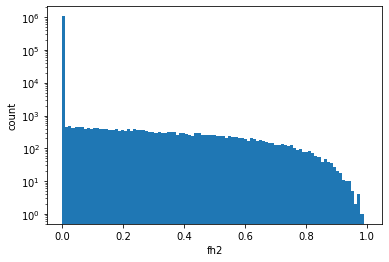

In [8]:
bins = np.linspace(0,1,100)
plt.hist(h2_fraction, bins=bins)
plt.xlabel("fh2")
plt.ylabel("count")
plt.yscale("log")
plt.show()


# bins = np.linspace(0.5,4,100)
# plt.hist(np.log10(smoothing_gas * 1e3), bins=bins)
# plt.xlabel("smoothing length log10(pc)")
# plt.ylabel("count")
# plt.yscale("log")
# plt.show()


# bins = np.linspace(0.5,4,100)
# plt.hist(tau_c)
# plt.xlabel("optical depth")
# plt.ylabel("count")
# plt.yscale("log")
# plt.show()


In [9]:
# # Save it to a file 
# np.savetxt("gunjan_m12i_res7100_md_fh2.txt", h2_fraction)

In [10]:
# plt.hist2d(
#     x = x_gas, 
#     y = y_gas, 
#     bins = 1024, 
#     norm = LogNorm()
# )
# plt.show()

In [11]:
print('Total Gas Mass: ', np.sum(gas_mass), 'x 1e10')
print('Total SFR: ', np.sum(SFR))
print('Total Mh2: ', np.sum(mass_h2), 'x 1e10')

Total Gas Mass:  0.7783943000016118 x 1e10
Total SFR:  2.1523869328957517
Total Mh2:  0.005580279980505257 x 1e10


# Lco calculation

In [12]:
n_bins = 2*R_index + 1


radius_bins = np.linspace(0., R_index, n_bins)

radius_center_bins = np.linspace(0, R_index, n_bins-1)

annulus_area = np.pi*(radius_bins[1:]**2 - radius_bins[:-1]**2)


digitized_gas = np.digitize(R_gas, radius_bins)

digitized_star = np.digitize(R_star, radius_bins) 

gas_mass_digitized = np.asarray([gas_mass[digitized_gas == i].sum() for i in range(1, len(radius_bins))])

sigma_gas = np.asarray([gas_mass[digitized_gas == i].sum()/annulus_area[i-1] for i in range(1, len(radius_bins))])*1.e10/1.e6

sigma_SFR = np.asarray([SFR[digitized_gas == i].sum()/annulus_area[i-1] for i in range(1, len(radius_bins))])

radial_velocity = vx_gas*np.cos(phi)*np.sin(theta)+vy_gas*np.sin(phi)*np.sin(theta)+vz_gas*np.cos(theta)

In [15]:
sigma_h2 = np.asarray(
    [mass_h2[digitized_gas == i].sum()/annulus_area[i-1] for i in range(1, len(radius_bins))]
)*1.e10/1.e6

sigma_h2[sigma_h2 == 0. ] = 1.e-30 

mass_h2_digitized  = np.asarray([np.sum(mass_h2[digitized_gas == i] ) for i in range(1, len(radius_bins))])

mass_h2_digitized[mass_h2_digitized == 0.] = 1.e-30


Z_prime_mass_averaged = np.asarray(
    [np.sum(mass_h2[digitized_gas == i]*Z_prime[digitized_gas == i])/mass_h2_digitized[i-1] for i in range(1, len(radius_bins))]
)


f_h2_annulus = sigma_h2/(sigma_gas)


gas_density_cgs 	  = gas_density*1.e10*M_sun/(kpc)**3.

index_gas_mass 		  = np.where(gas_density_cgs > 1.e-24)

gas_mass_total_indexed    = np.sum(gas_mass[index_gas_mass])

X_co_annulus		  = 1.3e21/(Z_prime_mass_averaged*sigma_h2**(0.5))

alpha_co_annulus        = X_co_annulus/6.3e19

# L_co_annulus 		  = mass_h2_digitized * 1e10/alpha_co_annulus
L_co_annulus 		  = np.sum(mass_h2) * 1e10/alpha_co_annulus

L_co_total		  = np.sum(L_co_annulus) #L_CO


print(f"total Lco: {L_co_total/1e6} e6")

total Lco: 10.149094367284397 e6


/tmp/ipykernel_1152882/1836868251.py:17: RuntimeWarning: divide by zero encountered in true_divide
  f_h2_annulus = sigma_h2/(sigma_gas)
/tmp/ipykernel_1152882/1836868251.py:26: RuntimeWarning: divide by zero encountered in true_divide
  X_co_annulus		  = 1.3e21/(Z_prime_mass_averaged*sigma_h2**(0.5))


In [14]:
len(mass_h2_digitized) == len(alpha_co_annulus)

True